In [6]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
import pathlib

from sklearn.preprocessing import StandardScaler

import cv2
import tensorflow as tf
from tensorflow import keras
from keras.models import Sequential
from keras.layers import Conv2D, MaxPooling2D, Dense, Dropout, Flatten
from keras.preprocessing.image import ImageDataGenerator

In [7]:
df = pathlib.Path("C:/Users/SREEHARI CR/data science/emotion")


In [8]:
# Initialize image data generator with rescaling
df = ImageDataGenerator(rescale=1./255)
validation_data_gen = ImageDataGenerator(rescale=1./255)

In [18]:

# Preprocess all test images
train_generator = df.flow_from_directory(
        'C:/Users/SREEHARI CR/data science/emotion_test',
        target_size=(48, 48),
        batch_size=64,
        color_mode="grayscale",
        class_mode='categorical')

Found 7178 images belonging to 1 classes.


In [13]:
# Preprocess all train images
validation_generator = validation_data_gen.flow_from_directory(
        'C:/Users/SREEHARI CR/data science/emotion',
        target_size=(48, 48),
        batch_size=64,
        color_mode="grayscale",
        class_mode='categorical')

Found 28710 images belonging to 7 classes.


In [14]:
# create model structure
emotion_model = Sequential([
    Conv2D(32, kernel_size=(3, 3), activation='relu', input_shape=(48, 48, 1)),
    Conv2D(64, kernel_size=(3, 3), activation='relu'),
    MaxPooling2D(pool_size=(2, 2)),
    Dropout(0.25),

    Conv2D(128, kernel_size=(3, 3), activation='relu'),
    MaxPooling2D(pool_size=(2, 2)),
    Conv2D(128, kernel_size=(3, 3), activation='relu'),
    MaxPooling2D(pool_size=(2, 2)),
    Dropout(0.25),
    Flatten(),
    Dense(1024, activation='relu'),
    Dropout(0.5),
    Dense(7, activation='softmax')
])

emotion_model.compile(optimizer='adam',
              loss="categorical_crossentropy",
              metrics=['accuracy'])

emotion_model.summary()
# Train the neural network/model
emotion_model_info = emotion_model.fit_generator(
        train_generator,
        steps_per_epoch=28709 // 64,
        epochs=15,
        validation_data=validation_generator,
        validation_steps=7178 // 64)

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 46, 46, 32)        320       
                                                                 
 conv2d_1 (Conv2D)           (None, 44, 44, 64)        18496     
                                                                 
 max_pooling2d (MaxPooling2D  (None, 22, 22, 64)       0         
 )                                                               
                                                                 
 dropout (Dropout)           (None, 22, 22, 64)        0         
                                                                 
 conv2d_2 (Conv2D)           (None, 20, 20, 128)       73856     
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 10, 10, 128)      0         
 2D)                                                    

C:\Users\SREEHARI CR\AppData\Local\Temp\ipykernel_15668\401249243.py:25: UserWarning: `Model.fit_generator` is deprecated and will be removed in a future version. Please use `Model.fit`, which supports generators.
  emotion_model_info = emotion_model.fit_generator(


Epoch 1/15
448/448 [==============================] - 387s 861ms/step - loss: 1.7471 - accuracy: 0.2880 - val_loss: 1.6306 - val_accuracy: 0.3740
Epoch 2/15
448/448 [==============================] - 177s 395ms/step - loss: 1.4984 - accuracy: 0.4150 - val_loss: 1.3770 - val_accuracy: 0.4653
Epoch 3/15
448/448 [==============================] - 173s 386ms/step - loss: 1.3611 - accuracy: 0.4750 - val_loss: 1.2471 - val_accuracy: 0.5399
Epoch 4/15
448/448 [==============================] - 169s 377ms/step - loss: 1.2789 - accuracy: 0.5110 - val_loss: 1.1548 - val_accuracy: 0.5735
Epoch 5/15
448/448 [==============================] - 1859s 4s/step - loss: 1.2168 - accuracy: 0.5345 - val_loss: 1.0880 - val_accuracy: 0.5903
Epoch 6/15
448/448 [==============================] - 176s 394ms/step - loss: 1.1676 - accuracy: 0.5577 - val_loss: 1.0114 - val_accuracy: 0.6230
Epoch 7/15
448/448 [==============================] - 170s 380ms/step - loss: 1.1281 - accuracy: 0.5712 - val_loss: 0.9727 - v

In [15]:
print(emotion_model_info.history.keys())

dict_keys(['loss', 'accuracy', 'val_loss', 'val_accuracy'])


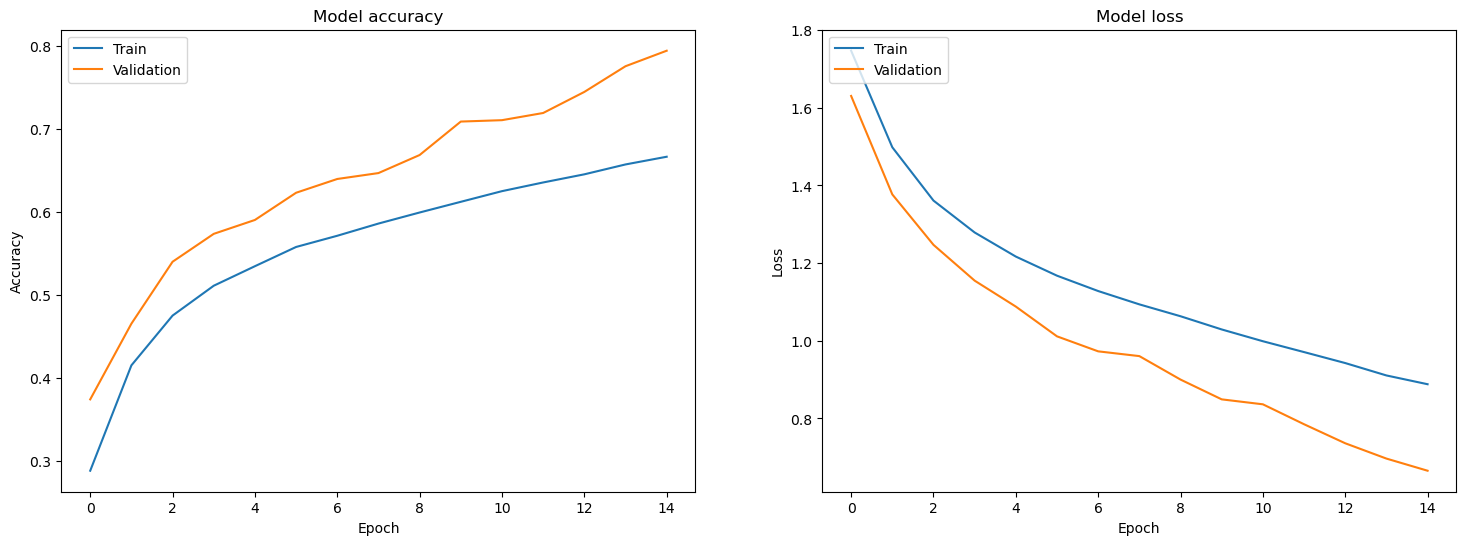

In [16]:
import matplotlib.pyplot as plt
fig, axes = plt.subplots(1,2, figsize=(18, 6))
# Plot training & validation accuracy values
axes[0].plot(emotion_model_info.history['accuracy'])
axes[0].plot(emotion_model_info.history['val_accuracy'])
axes[0].set_title('Model accuracy')
axes[0].set_ylabel('Accuracy')
axes[0].set_xlabel('Epoch')
axes[0].legend(['Train', 'Validation'], loc='upper left')

# Plot training & validation loss values
axes[1].plot(emotion_model_info.history['loss'])
axes[1].plot(emotion_model_info.history['val_loss'])
axes[1].set_title('Model loss')
axes[1].set_ylabel('Loss')
axes[1].set_xlabel('Epoch')
axes[1].legend(['Train', 'Validation'], loc='upper left')
plt.show()

In [17]:
emotion_model.save('facial_emotions_model.h5')

(48, 48, 1)


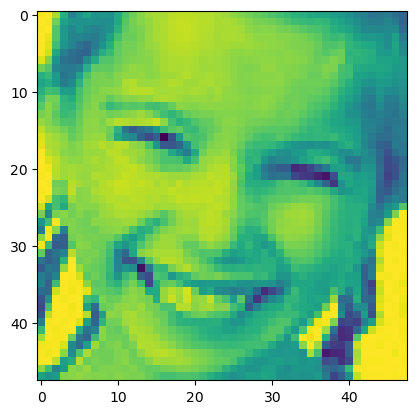

In [30]:
from tensorflow.keras.preprocessing import image
img_path='C:/Users/SREEHARI CR/data science/test3.jpg'
test_image=image.load_img(img_path,target_size=(48,48),color_mode='grayscale')
test_image=image.img_to_array(test_image)
print(test_image.shape)
plt.imshow(test_image)
plt.show()

In [31]:
test_image=test_image.reshape(1,48,48,1)
classes=['Angry','Disgust','Fear','Happy','Neutral','Sad','Surprise']
result=emotion_model.predict(test_image)
print(result[0])
y_pred=np.argmax(result[0])
print('The person facial emotion is:',classes[y_pred])

1/1 [==============================] - 0s 38ms/step
[0. 0. 0. 1. 0. 0. 0.]
The person facial emotion is: Happy
